## Seismic Data in the World

#### Task: 

Find an earthquake that happened in the last hour somewhere on this planet. Find a seismic station close enough, download the data and display them. Characterize the data. Find the onset time of the P wave. 


B:  International Federation of Digital Seismograph Networks (FDSN)  https://www.fdsn.org


 <p style="width:40%;float:center;padding-left:50px">
<img src=https://www.fdsn.org/static/img/layout/fdsn-logo.png>
<span style="font-size:smaller">
</span>
</p>

Check out this www page and find other stations with data for the Tohoku earthquake

http://www.fdsn.org/networks/

We use the client server BGR (Hannover)

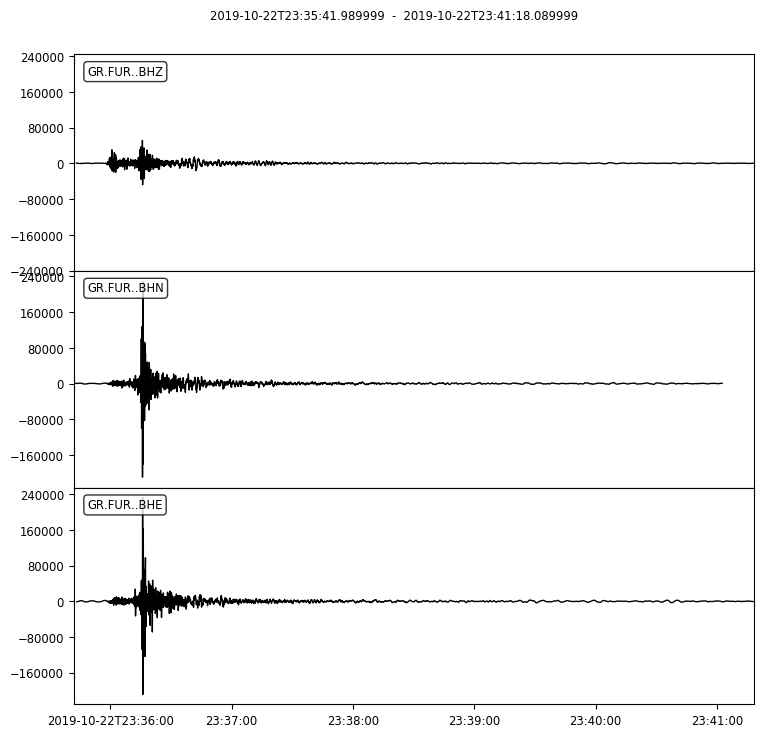

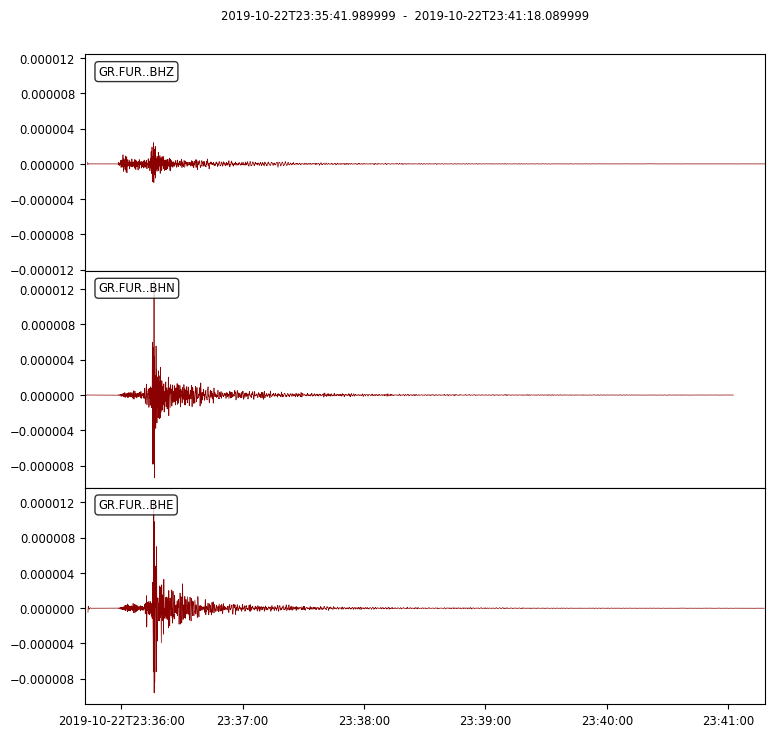

In [38]:
# Other station

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

client = Client("BGR")

t = UTCDateTime("2019-10-22T23:36:00")  # Austria
st = client.get_waveforms("GR", "FUR", "*", "BH*",
                          t , t + 5 * 60)

st.plot()

inv = client.get_stations(network="GR", station="FUR", channel="BH*", 
                     level="response", 
                     starttime=t, endtime=t+5*60)

st.attach_response(inv)

#####
# Choose only one of the following
#####
# remove the response and plot ACC
#resp_removed_ACC = stream.remove_response(output='ACC') # convert to acceleration in M/S
#resp_removed_ACC.plot(color='darkgreen', linewidth='0.5', handle='true')

# remove the response and plot VEL
# resp_removed_VEL = stream.remove_response(output='VEL') # convert to acceleration in M/S
# resp_removed_VEL.plot(color='darkblue', linewidth='0.5', handle='true')

# remove the response and plot DISP
resp_removed_DISP = st.remove_response(output='DISP') # convert to accelerationdsiplacment  in M/S
resp_removed_DISP.filter("highpass",freq=1.0)

resp_removed_DISP.plot(color='darkred', linewidth='0.5')
